In [38]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [39]:
current_dir = os.getcwd()
scripts = os.path.dirname(current_dir)
parent_dir = os.path.dirname(scripts)
parent_dir

'd:\\Cours_M2\\webscraping\\ml-webscrap-tennis'

In [40]:
dataset_path = os.path.join(parent_dir, "data", "tennis_dataset_clean.csv")
df = pl.read_csv(dataset_path)
df

player1_age,player1_ranking,player1_points,player1_win_rate,player1_win_rate_3_sets,player1_win_rate_tiebreak,player1_total_matches_dure,player1_win_rate_dure,player1_total_matches_terre battue,player1_win_rate_terre battue,player1_total_matches_gazon,player1_win_rate_gazon,player1_total_matches_salle,player1_win_rate_salle,player1_total_matches_carpet,player1_win_rate_carpet,player1_total_matches_acryl,player1_win_rate_acryl,player1_first_serve_pct,player1_first_serve_won_pct,player1_second_serve_won_pct,player1_return_points_won_pct,player1_break_point_won_pct,player1_double_fautes,player1_aces,player1_avg_first_serve_pct,player1_avg_first_serve_won_pct,player1_avg_second_serve_won_pct,player1_avg_return_points_won_pct,player1_avg_break_point_won_pct,player1_avg_double_fautes,player1_avg_aces,player2_age,player2_ranking,player2_points,player2_win_rate,player2_win_rate_3_sets,player2_win_rate_tiebreak,player2_total_matches_dure,player2_win_rate_dure,player2_total_matches_terre battue,player2_win_rate_terre battue,player2_total_matches_gazon,player2_win_rate_gazon,player2_total_matches_salle,player2_win_rate_salle,player2_total_matches_carpet,player2_win_rate_carpet,player2_total_matches_acryl,player2_win_rate_acryl,player2_first_serve_pct,player2_first_serve_won_pct,player2_second_serve_won_pct,player2_return_points_won_pct,player2_break_point_won_pct,player2_double_fautes,player2_aces,player2_avg_first_serve_pct,player2_avg_first_serve_won_pct,player2_avg_second_serve_won_pct,player2_avg_return_points_won_pct,player2_avg_break_point_won_pct,player2_avg_double_fautes,player2_avg_aces,tournament_category,target,surface_dure,surface_salle,surface_terre_batue,surface_gazon
i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64
26,30,1620,0.56,0.45,0.875,7,0.285714,26,0.653846,3,0.0,14,0.642857,0,0,0,0,0.73,0.66,0.46,0.32,0.4,3,1,0.639398,0.682243,0.518603,0.385329,0.426267,3.118644,3.372881,24,78,715,0.38,0.409091,0.8,19,0.421053,19,0.368421,4,0.25,8,0.375,0,0,0,0,0.73,0.77,0.45,0.4,0.43,2,7,0.597448,0.683836,0.496891,0.363358,0.413428,2.72549,5.235294,3,0,1,0,0,0
22,44,1198,0.5,0.5625,0.6875,9,0.111111,31,0.677419,5,0.4,5,0.2,0,0,0,0,0.49,0.53,0.26,0.45,0.43,3,0,0.581952,0.703718,0.516236,0.379335,0.408108,2.086207,5.172414,23,47,1148,0.5,0.55,0.6,9,0.222222,33,0.666667,3,0.0,5,0.2,0,0,0,0,0.7,0.6,0.44,0.61,0.54,0,0,0.656364,0.643451,0.478458,0.41633,0.421446,2.28,2.52,1,0,0,0,1,0
28,152,382,0.46,0.407407,0.529412,14,0.357143,27,0.481481,7,0.571429,2,0.5,0,0,0,0,0.58,0.62,0.49,0.41,0.4,5,5,0.611845,0.6896,0.503783,0.383568,0.366584,3.960784,4.784314,20,170,340,0.54,0.666667,0.571429,41,0.609756,0,0.0,4,0.0,5,0.4,0,0,0,0,0.6,0.68,0.46,0.44,0.42,3,9,0.61509,0.727725,0.470861,0.368983,0.39528,2.37037,8.222222,4,0,1,0,0,0
24,112,548,0.68,0.526316,0.571429,8,0.625,36,0.722222,2,0.5,4,0.5,0,0,0,0,0.54,0.6,0.51,0.44,0.33,3,5,0.572069,0.731921,0.500616,0.414628,0.435407,3.196078,5.294118,25,175,327,0.46,0.444444,0.466667,20,0.6,18,0.333333,3,0.0,9,0.555556,0,0,0,0,0.45,0.63,0.51,0.44,0.33,2,3,0.59147,0.702494,0.476691,0.380679,0.378378,2.509804,4.27451,3,1,0,0,1,0
24,27,1690,0.52,0.52381,0.636364,9,0.333333,33,0.69697,3,0.0,5,0.0,0,0,0,0,0.8,0.62,0.6,0.34,0.33,0,1,0.719494,0.6375,0.512132,0.395948,0.405542,1.886792,2.09434,28,90,639,0.46,0.423077,0.578947,21,0.380952,10,0.3,2,0.5,17,0.647059,0,0,0,0,0.56,0.88,0.37,0.39,0.75,2,7,0.602845,0.7252,0.516697,0.356823,0.350453,2.403846,6.769231,1,0,1,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
29,49,1119,0.52,0.653846,0.411765,15,0.6,16,0.5,7,0.428571,12,0.5,0,0,0,0,0.61,0.77,0.62,0.34,0.67,3,11,0.648598,0.71766,0.515091,0.365514,0.401099,2.27451,5.529412,26,6,4255,0.6,0.

In [41]:
df.shape

(3794, 70)

In [42]:
X, y = df.drop("target"), df.select("target")

In [43]:
X = X.to_numpy()
y = y.to_numpy().flatten()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state= 42)

# Modèle 

In [45]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report,mean_squared_error, r2_score
import xgboost as xgb

## Régression linéaire

In [46]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

y_pred_linear = linear_r.predict(X_test)

In [47]:
print("Training set score: {:.2f}".format(linear_r.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_r.score(X_test, y_test)))
# Pas d'overfitting

Training set score: 0.63
Test set score: 0.59


In [48]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.09677300097575832
R² Score: 0.5919648424030219


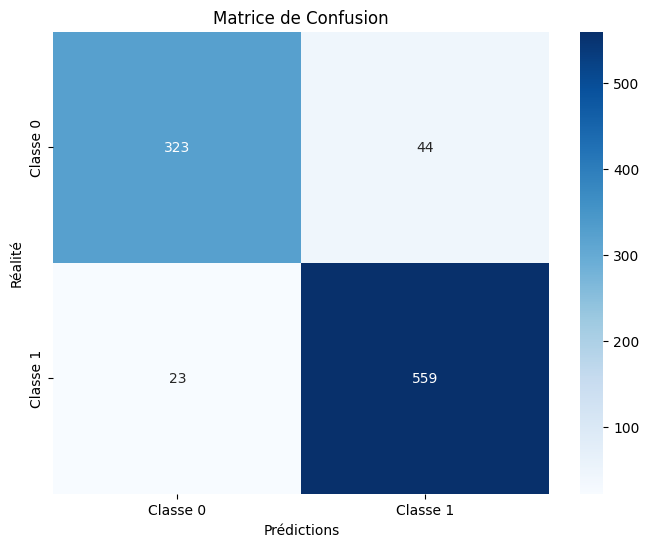

In [49]:
y_pred_binary = (y_pred_linear >= 0.5).astype(int)

cm_linear = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


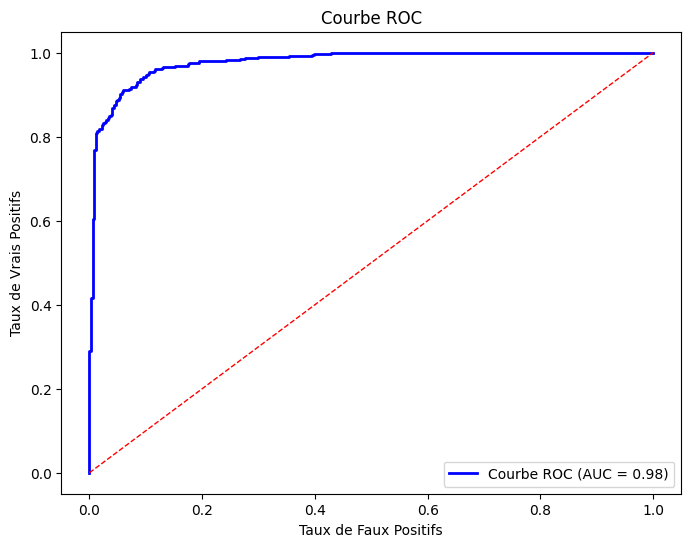

In [50]:
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_linear)  
roc_auc_linear = auc(fpr_linear, tpr_linear)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc_linear))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## Ridge

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.59


In [52]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.61
Test set score: 0.57


In [53]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.59


## Lasso

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.06
Test set score: 0.05


## Régression logistique

In [55]:
logreg_model  = LogisticRegression(solver='liblinear', max_iter=10_000)

In [ ]:
param_grid_logreg = {
    'C': [10, 50, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, verbose=0)
grid_search_logreg.fit(X_train, y_train)

Meilleurs paramètres (Regression Logistic): {'C': 50, 'solver': 'liblinear'}


In [59]:
print("Meilleurs paramètres (Regression Logistic):\n", grid_search_logreg.best_params_)

results_logreg = pl.DataFrame(grid_search_logreg.cv_results_)
display(results_logreg.head(6))

Meilleurs paramètres (Regression Logistic):
 {'C': 50, 'solver': 'liblinear'}


mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,i64,str,struct[2],f64,f64,f64,f64,f64,f64,f64,i32
0.986715,0.206958,0.001718,0.000789,10,"""liblinear""","{10,""liblinear""}",0.903339,0.912127,0.929701,0.920914,0.924429,0.918102,0.009339,3
32.502063,3.346186,0.001479,0.000159,10,"""saga""","{10,""saga""}",0.692443,0.659051,0.655536,0.68717,0.646749,0.66819,0.018176,4
0.832861,0.175107,0.002101,0.000444,50,"""liblinear""","{50,""liblinear""}",0.915641,0.913884,0.938489,0.924429,0.929701,0.924429,0.009098,1
35.120363,1.242007,0.001666,0.000582,50,"""saga""","{50,""saga""}",0.692443,0.659051,0.655536,0.68717,0.646749,0.66819,0.018176,4
0.611029,0.024455,0.001807,0.000545,100,"""liblinear""","{100,""liblinear""}",0.912127,0.915641,0.931459,0.920914,0.926186,0.921265,0.006977,2
37.394066,4.611922,0.001756,0.000474,100,"""saga""","{100,""saga""}",0.692443,0.659051,0.655536,0.68717,0.646749,0.66819,0.018176,4


In [33]:
best_logreg_model = grid_search_logreg.best_estimator_
best_logreg_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_model.score(X_test, y_test)))

y_pred_logreg = best_logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Régression Logistique): {accuracy_logreg:.4f}")

Training set score: 0.918
Test set score: 0.913
Accuracy (Régression Logistique): 0.9283


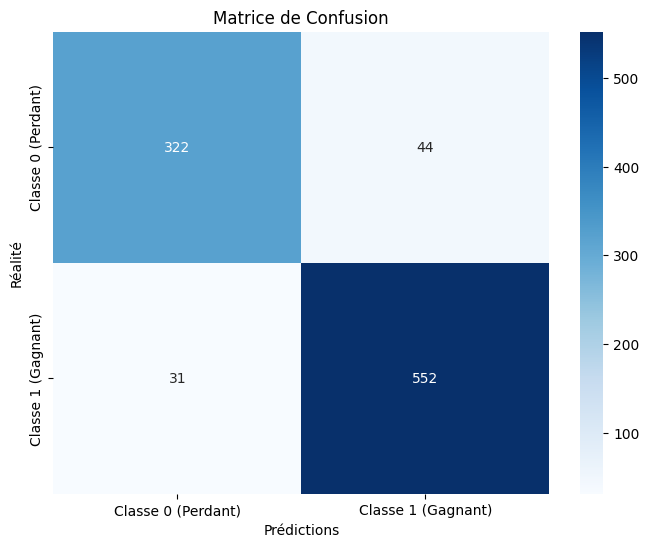

In [31]:
cm_logreg  = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


AUC (Arbre de décision): 0.9826598805875021


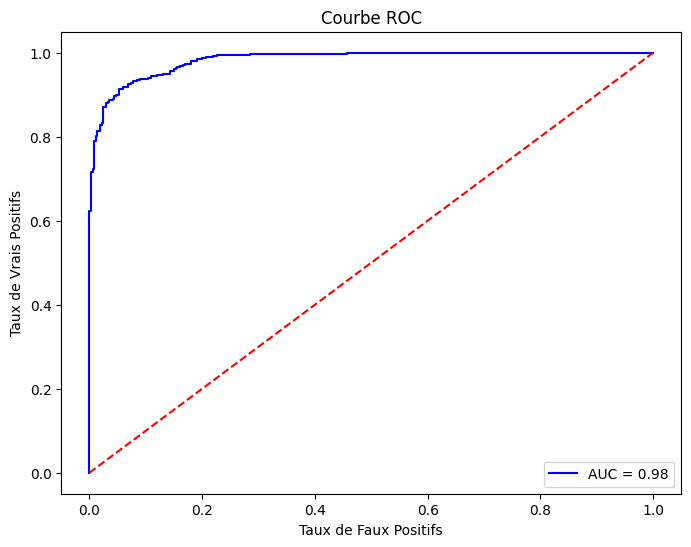

In [32]:
y_pred_prob_logistic = best_logreg_model .predict_proba(X_test)[:, 1] 
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logistic)


plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'AUC = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Logistic Regression')
plt.legend()
plt.show()



## Decision tree

In [60]:
tree_model = DecisionTreeClassifier(random_state=42)

In [61]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 10, 20]
}

grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, verbose=0)

grid_search_tree.fit(X_train, y_train)

print("Meilleurs paramètres (Arbre de Décision):", grid_search_tree.best_params_)

Meilleurs paramètres (Arbre de Décision): {'max_depth': 5, 'min_samples_split': 20}


In [69]:
print("Meilleurs paramètres (Arbre de Décision):\n", grid_search_tree.best_params_)

results_tree = pl.DataFrame(grid_search_tree.cv_results_)
display(results_tree.filter(
    pl.col("rank_test_score") <= 6
))

Meilleurs paramètres (Arbre de Décision):
 {'max_depth': 5, 'min_samples_split': 20}


mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,object,i64,struct[2],f64,f64,f64,f64,f64,f64,f64,i32
0.17258,0.015184,0.002883,0.001339,null,20,"{null,20}",0.878735,0.873462,0.864675,0.864675,0.880492,0.872408,0.006724,6
0.068139,0.001616,0.001565,0.000483,5,2,"{5,2}",0.889279,0.901582,0.903339,0.894552,0.892794,0.896309,0.005331,2
0.063521,0.007939,0.001069,0.00014,5,10,"{5,10}",0.889279,0.901582,0.903339,0.892794,0.892794,0.895958,0.005491,3
0.061646,0.005176,0.001761,0.000942,5,20,"{5,20}",0.892794,0.901582,0.901582,0.892794,0.894552,0.896661,0.004069,1
0.132403,0.045907,0.001715,0.000723,10,10,"{10,10}",0.878735,0.866432,0.86819,0.87522,0.87522,0.872759,0.004663,5
0.197979,0.012513,0.003856,0.002937,10,20,"{10,20}",0.876977,0.87522,0.862917,0.87522,0.88225,0.874517,0.006346,4
0.10871,0.032156,0.002126,0.001227,20,20,"{20,20}",0.878735,0.873462,0.864675,0.864675,0.880492,0.872408,0.006724,6


In [72]:
best_tree_model = grid_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(grid_search_tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(grid_search_tree.score(X_test, y_test)))

y_pred_tree = best_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Arbre de Décision): {accuracy_tree:.4f}")

Training set score: 0.931
Test set score: 0.911
Accuracy (Arbre de Décision): 0.9115


In [73]:
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       367
           1       0.93      0.92      0.93       582

    accuracy                           0.91       949
   macro avg       0.91      0.91      0.91       949
weighted avg       0.91      0.91      0.91       949



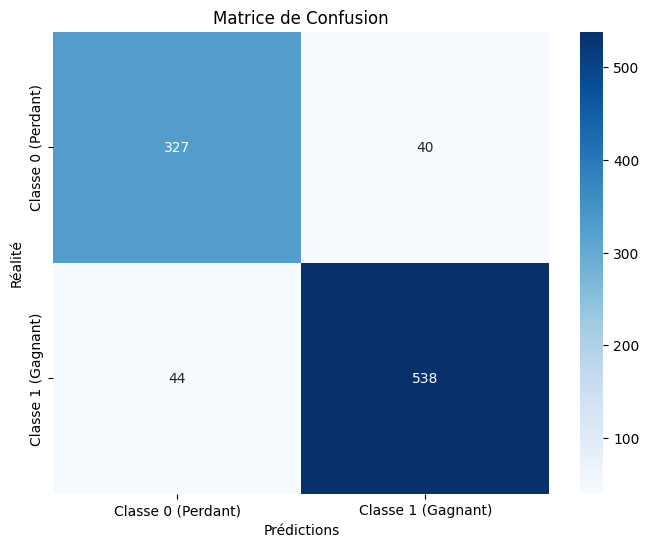

In [74]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


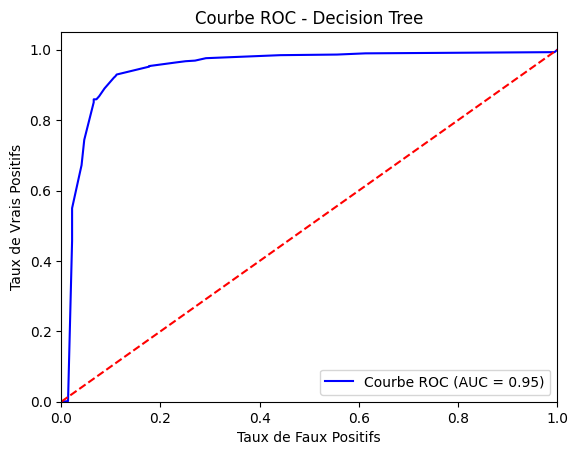

In [75]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, best_tree_model.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', label=f"Courbe ROC (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [50]:
rf_model = RandomForestClassifier(random_state=42)


In [51]:
cv_scores_rf = []
for train_idx, test_idx in tqdm(cv.split(X_train), total=cv.get_n_splits(), desc="Validation croisée (Forêt Aléatoire)"):
    X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    rf_model.fit(X_train_cv, y_train_cv)
    score = rf_model.score(X_test_cv, y_test_cv)
    cv_scores_rf.append(score)

print("CV Scores (Forêt Aléatoire):", cv_scores_rf)


Validation croisée (Forêt Aléatoire): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

CV Scores (Forêt Aléatoire): [0.9244288224956063, 0.9261862917398945, 0.8910369068541301, 0.9050966608084359, 0.9121265377855887]


In [52]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, verbose=0)

# Affichage de la barre de progression pendant la recherche des hyperparamètres
with tqdm(total=len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']), desc="Recherche des meilleurs paramètres (Forêt Aléatoire)") as pbar:
    grid_search_rf.fit(X_train, y_train)
    pbar.update(1)

print("Meilleurs paramètres (Forêt Aléatoire):", grid_search_rf.best_params_)

Recherche des meilleurs paramètres (Forêt Aléatoire):  11%|█         | 1/9 [01:50<14:45, 110.70s/it]

Meilleurs paramètres (Forêt Aléatoire): {'max_depth': 10, 'n_estimators': 200}


In [53]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

In [54]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Forêt Aléatoire): {accuracy_rf:.4f}")

Accuracy (Forêt Aléatoire): 0.9273


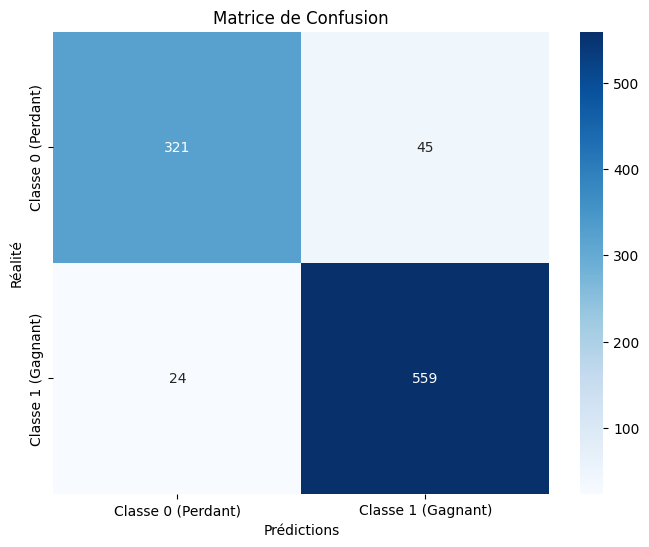

In [57]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

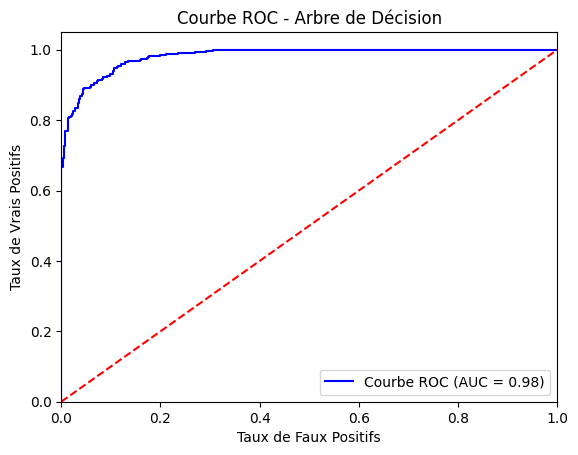

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Courbe ROC (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


## XGBoost

In [47]:
xgb_model = xgb.XGBClassifier(random_state=42)

CV Scores (Random Forest): [0.91564148 0.9086116  0.89455185 0.91739895 0.92618629]


KeyboardInterrupt: 

In [ ]:
cv_scores_xgb = []
for train_idx, test_idx in tqdm(cv.split(X_train), total=cv.get_n_splits(), desc="Validation croisée (XGBoost)"):
    X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    xgb_model.fit(X_train_cv, y_train_cv)
    score = xgb_model.score(X_test_cv, y_test_cv)
    cv_scores_xgb.append(score)

print("CV Scores (XGBoost):", cv_scores_xgb)

In [ ]:
param_grid_xgb = {'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [100, 200]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, verbose=0)

with tqdm(total=len(param_grid_xgb['max_depth']) * len(param_grid_xgb['learning_rate']) * len(param_grid_xgb['n_estimators']), desc="Recherche des meilleurs paramètres (XGBoost)") as pbar:
    grid_search_xgb.fit(X_train, y_train)
    pbar.update(1)

print("Meilleurs paramètres (XGBoost):", grid_search_xgb.best_params_)


In [ ]:
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

y_pred_xgb = best_xgb_model.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f"Courbe ROC (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()


## SVM

In [63]:
svm_model = SVC(probability=True, random_state=42)

In [64]:
cv_scores_svm = []
for train_idx, test_idx in tqdm(cv.split(X_train), total=cv.get_n_splits(), desc="Validation croisée (SVM)"):
    X_train_cv, X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    svm_model.fit(X_train_cv, y_train_cv)
    score = svm_model.score(X_test_cv, y_test_cv)
    cv_scores_svm.append(score)

print("CV Scores (SVM):", cv_scores_svm)


Validation croisée (SVM): 100%|██████████| 5/5 [00:22<00:00,  4.51s/it]

CV Scores (SVM): [0.6502636203866432, 0.616871704745167, 0.5834797891036907, 0.632688927943761, 0.6379613356766256]


In [65]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, verbose=0)

with tqdm(total=len(param_grid_svm['C']) * len(param_grid_svm['kernel']), desc="Recherche des meilleurs paramètres (SVM)") as pbar:
    grid_search_svm.fit(X_train, y_train)
    pbar.update(1)

print("Meilleurs paramètres (SVM):", grid_search_svm.best_params_)


Recherche des meilleurs paramètres (SVM):   0%|          | 0/6 [00:00<?, ?it/s]

: 

: 

In [ ]:
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)

y_pred_svm = best_svm_model.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")


In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()


In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label=f"Courbe ROC (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

## KNN

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 10, 20]
}

grid_search_knn = GridSearchCV(tree_model, param_grid_tree, cv=5, verbose=0)

grid_search_knn.fit(X_train, y_train)

print("Meilleurs paramètres (KNN):", grid_search_knn.best_params_)


In [ ]:
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)

y_pred_knn = best_knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.4f}")


In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'], yticklabels=['Classe 0 (Perdant)', 'Classe 1 (Gagnant)'])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label=f"Courbe ROC (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Arbre de Décision')
plt.legend(loc="lower right")
plt.show()

# 2